In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import time
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
color = "#2E3037"

## 1_Carregando e preprocessando

### Loading data

In [3]:
data_full = pd.read_csv("../dataset/dataset_3.csv", sep = ";")
data_full.describe()

,Unnamed: 0,TP_ESCOLA,TP_LINGUA,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Ocupacao_Mae,Renda_Mensal,Banheiros,Quartos,...,TV_Assinatura,Celular,Telefone_Fixo,Computador,Internet,DESEMPENHO_BAIXO,Renda_per_capta,Pessoas_por_quarto,Pessoas_por_computador,Pessoas_por_celular
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,...,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,1.584448e+06,4.491498e-01,5.271628e-01,3.439471e+00,4.073692e+00,2.296138e+00,2.226948e+00,3.496580e+00,1.369465e+00,2.249797e+00,...,2.136560e-01,2.399529e+00,2.399118e-01,6.882020e-01,7.773933e-01,5.000047e-01,8.346541e+02,1.871815e+00,1.819410e+00,1.873938e+00
std,9.147822e+05,6.148688e-01,4.992617e-01,1.873869e+00,1.719509e+00,1.392760e+00,1.279828e+00,3.254036e+00,7.059705e-01,7.662689e-01,...,4.098868e-01,1.070197e+00,4.270295e-01,7.721223e-01,4.159964e-01,5.000001e-01,1.252211e+03,9.952978e-01,1.986800e+00,1.311751e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.922242e+05,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.994000e+02,1.333333e+00,0.000000e+00,1.000000e+00
50%,1.584448e+06,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,...,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.990000e+02,1.666667e+00,1.333333e+00,1.500000e+00
75%,2.376673e+06,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.316667e+02,2.000000e+00,3.000000e+00,2.000000e+00
max,3.168897e+06,2.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,4.000000e+00,4.000000e+00,...,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+04,2.000000e+01,2.000000e+01,2.000000e+01


In [4]:
sample_size = 1000000
data = data_full.sample(n=sample_size,random_state=42)

### Spliting train and test data

In [5]:
train, test = train_test_split(data, test_size=0.30)

## 2_Otimizando a Arvore 

### 2.1_Testando número de nós

In [6]:
max_feaf_nodes = [4,8,16,32,64,128,256,512,1024,2048,4090]
params = {'max_leaf_nodes' : max_feaf_nodes}

dtree = DecisionTreeClassifier()

dtree_random = GridSearchCV(dtree, params, scoring = ['accuracy','recall','precision'],n_jobs = -1,refit=False,verbose=0)
dtree_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,


In [7]:
test_recall = pd.DataFrame(dtree_random.cv_results_)['mean_test_recall'].to_list()
test_precision = pd.DataFrame(dtree_random.cv_results_)['mean_test_precision'].to_list()
test_accuracy = pd.DataFrame(dtree_random.cv_results_)['mean_test_accuracy'].to_list()

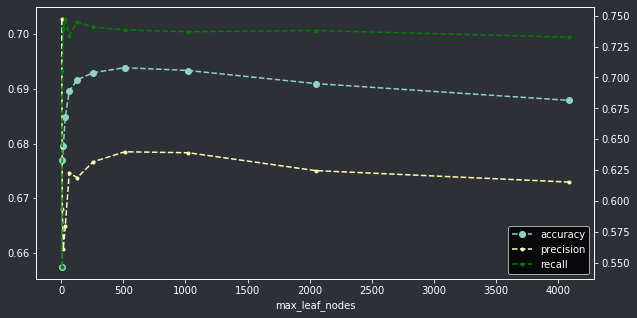

In [16]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,5), facecolor=color)
ax.set_xlabel("max_leaf_nodes")
ax.set_facecolor(color)

ln1 = ax.plot(max_feaf_nodes, test_accuracy, marker='o', label="accuracy",linestyle='--')
ln2 = ax.plot(max_feaf_nodes, test_precision, marker='.', label="precision",linestyle='--')

ax2 = ax.twinx()
ln3 = ax2.plot(max_feaf_nodes, test_recall, marker='.', label="recall",color='green',linestyle='--')

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4)

plt.savefig('../pictures/Arvore_score_leaf_nodes.png', bbox_inches='tight')
plt.show()

In [9]:
print(f'% da recall com 128 nós: {(np.array(test_recall)/max(test_recall))[6]}')
print(f'% da precisão com 128 nós: {(np.array(test_precision)/max(test_precision))[6]}')
print(f'% da precisão com 128 nós: {(np.array(test_accuracy)/max(test_accuracy))[6]}')

% da recall com 128 nós: 0.9917429264658122
% da precisão com 128 nós: 0.962892004280473
% da precisão com 128 nós: 0.9986762247494503


### 2.2_Testando outros hiperparâmetros

In [10]:
grid = {'splitter' : ['best', 'random'],
        'max_features' : [None, 'sqrt', 'log2'],
        'presort' : [True, False],
        'max_leaf_nodes' : [128],
        'min_impurity_decrease': [0.000005, 0.000001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0]
        }

dtree = DecisionTreeClassifier()
dtree_random = GridSearchCV(dtree, grid, scoring = ['accuracy','recall','precision'],n_jobs = -1,refit=False,verbose=0)
dtree_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_features': [None, 'sqrt', 'log2'],
            

In [11]:
best_params = pd.DataFrame(dtree_random.cv_results_).sort_values(by='mean_test_accuracy',ascending=False)['params'][0]
best_params

{'max_features': None,
 'max_leaf_nodes': 128,
 'min_impurity_decrease': 5e-06,
 'presort': True,
 'splitter': 'best'}

### 2.3_Gerando Resultados

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Precision: 0.6919
Recall: 0.7372471547635677
Accuracy: 0.6919


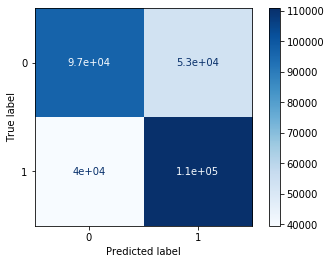

In [12]:
model = DecisionTreeClassifier(**best_params).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))
precision = precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "micro")
recall = recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")
accuracy = accuracy_score(test["DESEMPENHO_BAIXO"] , predictions)
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("Accuracy: " + str(accuracy))
plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = "Blues")

##### Como essa configuração não consegue bater o desempenho da treinada com apenas 128 nós, utilizamos a anterior 

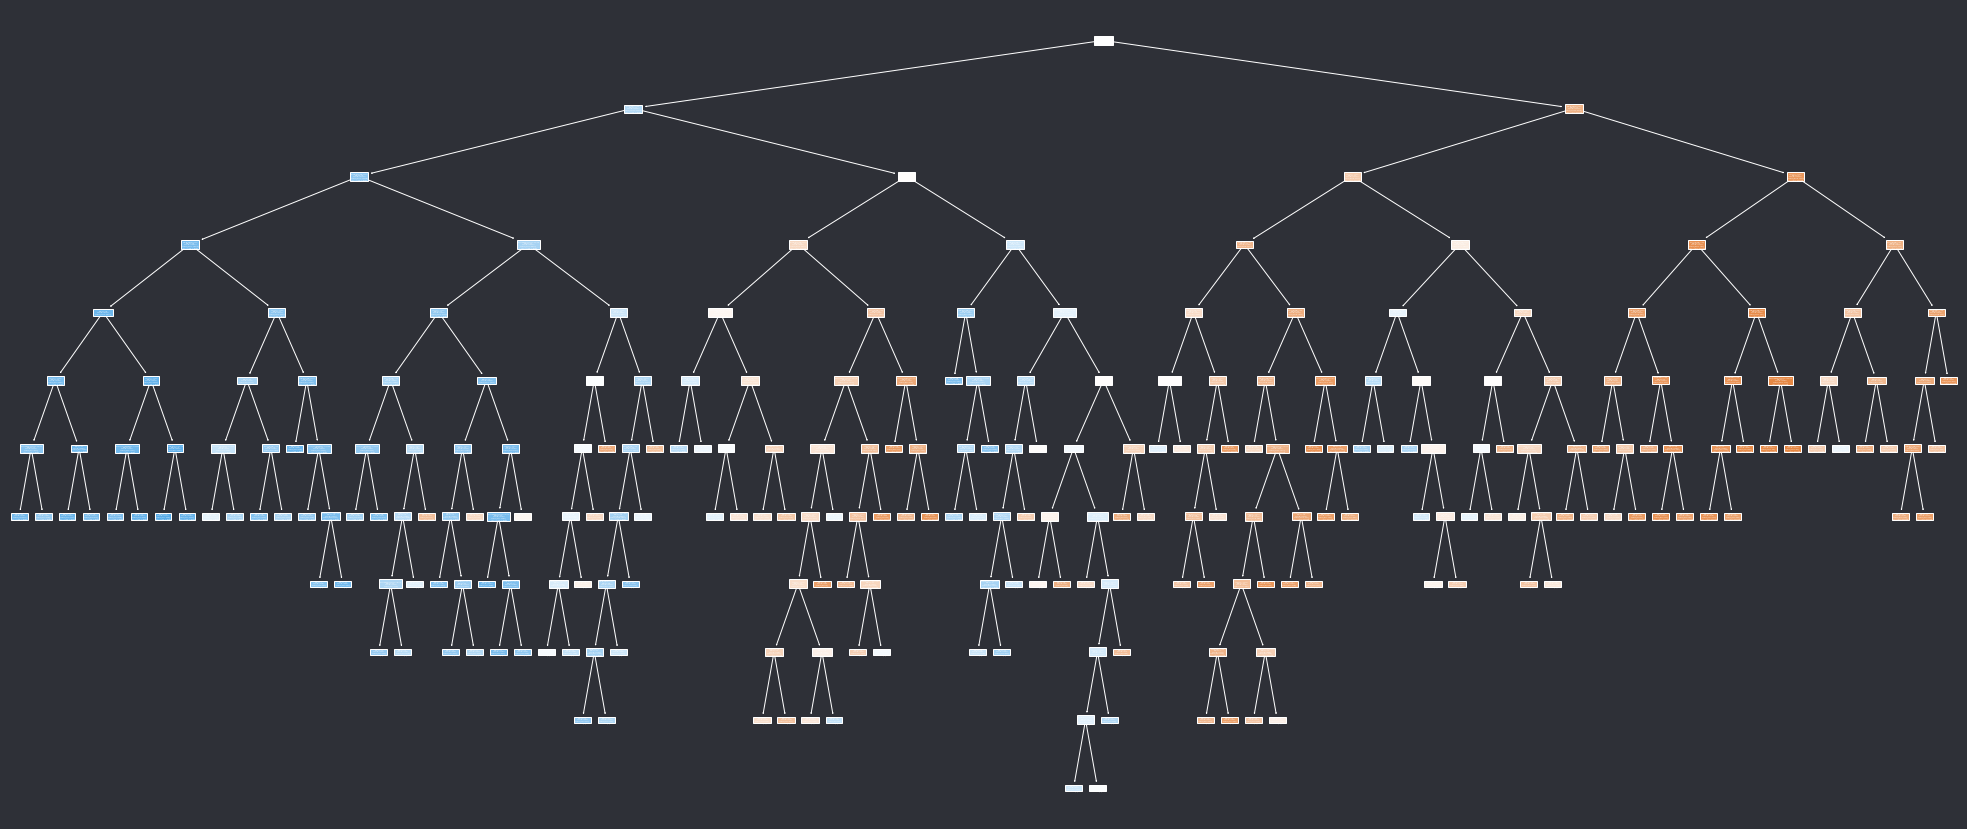

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(35, 15), facecolor=color)
ax = plt.gca()
ax.set_facecolor(color)
tree_text = tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True)
plt.savefig('../pictures/plot_arvore.png', bbox_inches='tight')

## 3_Treinando com random forests 

In [14]:
n_estimators =  [25,50,100,200,400,800]
params = {'max_leaf_nodes' : [128],
         'n_estimators' : n_estimators}

rforest = RandomForestClassifier()

rforest_random = GridSearchCV(rforest, params, scoring = ['accuracy','recall','precision'],n_jobs = -1,refit=False,verbose=0)
rforest_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

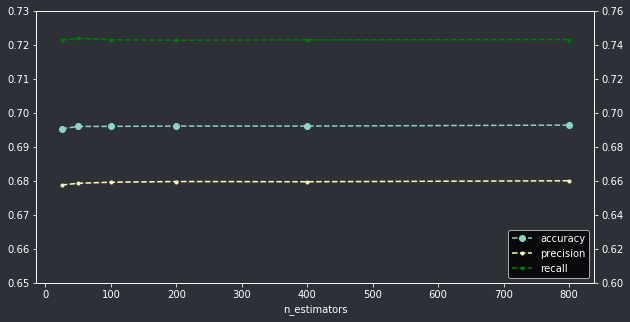

In [15]:
test_recall_forest = pd.DataFrame(rforest_random.cv_results_)['mean_test_recall'].to_list()
test_precision_forest = pd.DataFrame(rforest_random.cv_results_)['mean_test_precision'].to_list()
test_accuracy_forest = pd.DataFrame(rforest_random.cv_results_)['mean_test_accuracy'].to_list()


fig, ax = plt.subplots(figsize=(10,5), facecolor=color)
ax.set_xlabel("n_estimators")
ax.set_facecolor(color)

ln1 = ax.plot(n_estimators, test_accuracy_forest, marker='o', label="accuracy",linestyle='--')
ln2 = ax.plot(n_estimators, test_precision_forest, marker='.', label="precision",linestyle='--')
plt.ylim(0.65,0.73)

ax2 = ax.twinx()
ln3 = ax2.plot(n_estimators, test_recall_forest, marker='.', label="recall",color='green',linestyle='--')
plt.ylim(0.6,0.76)

lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4)

plt.savefig('../pictures/Floresta_score_leaf_nodes.png', bbox_inches='tight')
plt.show()